# Linear Discriminant Functions

Linear discriminant functions are a simple method of classifying data into classes. The model takes in an input vector and produces a value that determines its class. Outputs greater than $0$ are typically labeled one class and outputs less than $0$ are labeled the other, with outputs of $0$ being ambiguous. 

We will be using the method of least squares to build linear discriminant functions and their corresponding decision boundaries, revealing the nature of least squares as well as its shortcomings. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We first need to simulate some data. To make it linearly separable, we will sample from two sufficiently different distributions.

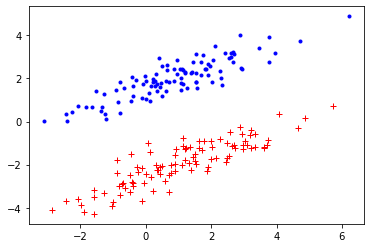

In [2]:
c1numpoints = 100
c2numpoints = 100

mu1 = np.array([1, 2])
sigma1 = np.array([[3, 1.5], [1.5, 1]])
c1 = np.random.multivariate_normal(mu1, sigma1, c1numpoints)

mu2 = np.array([1, -2])
sigma2 = np.array([[3, 1.5], [1.5, 1]])
c2 = np.random.multivariate_normal(mu2, sigma2, c2numpoints)

plt.plot(c1[:, 0], c1[:, 1], 'b.')
plt.plot(c2[:, 0], c2[:, 1], 'r+')

It isn't too hard to visualize where the boundary between the two classes will be drawn. However, we will mathematically decide the boundary through least squares.

The model assumption we will be making is that each class can be described by a linear relationship given by 

$$y_{k}(\textbf{x}) = \textbf{w}_{k}^T \textbf{x} + w_{k0}$$ 

Note that the number of classes k ranges from $1 \text{ to } K$ and both $\tilde{\textbf{w}_{k}} \text{ and } x \text{ are } D+1 $ dimensional. By combining the $\textbf{w}_{k}$ and $w_{k0}$ into $\tilde{\textbf{w}_{k}} = (w_{k0}, \textbf{w}_{k}^T)^T$ we can write $\tilde{\textbf{W}} = (\tilde{\textbf{w}_{1}}, \tilde{\textbf{w}_{2}}, ... , \tilde{\textbf{w}_{K}})$ and rewrite our previous equation as 

$$ \textbf{y}(\textbf{x}) = \tilde{\textbf{W}}^T \tilde{\textbf{x}}$$

where $\tilde{\textbf{W}}$ is $D+1 \text{ by } K$ dimensional. 

Now suppose our training data took the form $(x_{n}, t_{n})$, where $t_{n}$ is an indicator vector and $n$ ranges from $1 \text{ to } N$. That is, we have $N$ data points. 

If we define $T = (\textbf{t}_{1}^T, \textbf{t}_{2}^T, ..., \textbf{t}_{N}^T)$ to be the matrix whose columns are our correct classifications, then $\tilde{X}\tilde{W}$ will give us the model classifications, which may or may not be correct. Thus our sum-of-squares error function will look like the following:

$$E_{D}(\tilde{\textbf{W}}) = \frac{1}{N}Tr((\tilde{X}\tilde{W} - T)^T(\tilde{X}\tilde{W} - T))$$

We use the trace here to ensure the model classifications for $x_{n}$ are compared to $t_{n}$ and not some other $t_{i}$, which we are not interested in.

As usual, we set the derivative to zero and solve for the minimum to get 

$$ \tilde{W} = (\tilde{X}^T\tilde{X})^{-1}\tilde{X}^T T = \tilde{X}^{\dagger}T$$

This is exactly what we do in the following code.

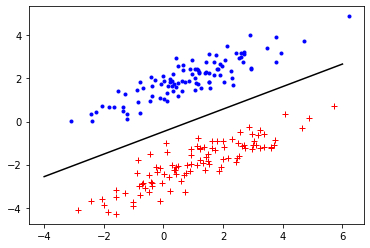

In [3]:
xtilde = np.vstack((np.hstack((np.ones((c1numpoints, 1)), c1)), 
                    np.hstack((np.ones((c2numpoints, 1)), c2))))
T = np.vstack((np.hstack((np.ones((c1numpoints, 1)), np.zeros((c1numpoints, 1)))), 
               np.hstack((np.zeros((c2numpoints, 1)), np.ones((c2numpoints, 1))))))

wtilde = np.matmul(np.linalg.pinv(xtilde), T)
x = np.linspace(-4, 6, 10000)
wdec = wtilde[:, 0] - wtilde[:, 1]
y = (-wdec[0] - (wdec[1] * x)) / wdec[2]

plt.plot(c1[:, 0], c1[:, 1], 'b.')
plt.plot(c2[:, 0], c2[:, 1], 'r+')
plt.plot(x, y, 'k-')

Not bad! The linear discriminant function plays nice with relatively consistent distributions that are linearly separable, but data is rarely that organized. We can play around with different distributions to see their effects on the decision boundary. 

In [4]:
def lindiscr(c1num, c2num, mu1, sig1, mu2, sig2):
    
    c1 = np.random.multivariate_normal(mu1, sig1, c1num)
    c2 = np.random.multivariate_normal(mu2, sig2, c2num)

    xtilde = np.vstack((np.hstack((np.ones((c1num, 1)), c1)), 
                        np.hstack((np.ones((c2num, 1)), c2))))
    T = np.vstack((np.hstack((np.ones((c1num, 1)), np.zeros((c1num, 1)))), 
                   np.hstack((np.zeros((c2num, 1)), np.ones((c2num, 1))))))

    wtilde = np.matmul(np.linalg.pinv(xtilde), T)
    x = np.linspace(-4, 6, 10000)
    wdec = wtilde[:, 0] - wtilde[:, 1]
    y = (-wdec[0] - (wdec[1] * x)) / wdec[2]

    plt.plot(c1[:, 0], c1[:, 1], 'b.')
    plt.plot(c2[:, 0], c2[:, 1], 'r+')
    plt.plot(x, y, 'k-')

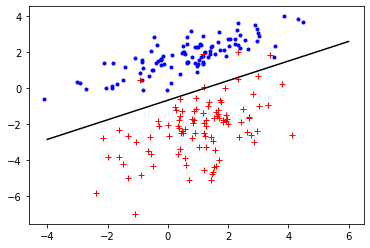

In [5]:
lindiscr(100, 100, np.array([1, 2]), np.array([[3, 1.5], [1.5, 1]]), np.array([1, -2]), np.array([[2, 1], [1, 2]]))

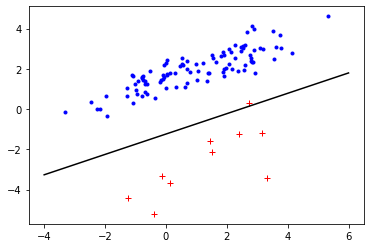

In [6]:
lindiscr(100, 10, np.array([1, 2]), np.array([[3, 1.5], [1.5, 1]]), np.array([1, -2]), np.array([[2, 1], [1, 2]]))

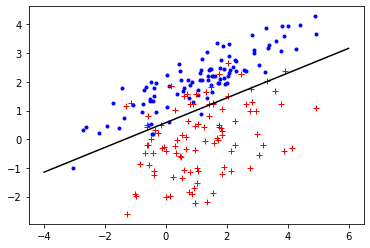

In [7]:
lindiscr(100, 100, np.array([1, 2]), np.array([[3, 1.5], [1.5, 1]]), np.array([1, 0]), np.array([[2, 1], [1, 2]]))

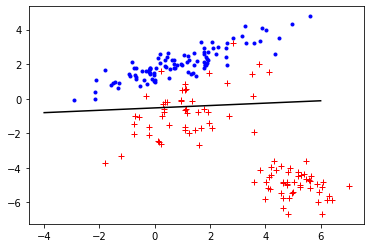

In [8]:
c1numpoints = int(100)
c2numpoints = int(100)

mu1 = np.array([1, 2])
sigma1 = np.array([[3, 1.5], [1.5, 1]])
c1 = np.random.multivariate_normal(mu1, sigma1, c1numpoints)

mu2 = np.array([1, -1])
sigma2 = np.array([[2, 1], [1, 2]])
c21 = np.random.multivariate_normal(mu2, sigma2, (c2numpoints//2))

mu3 = np.array([5, -5])
sigma3 = np.array([[0.5, 0], [0, 0.5]])
c22 = np.random.multivariate_normal(mu3, sigma3, (c2numpoints//2))
c2 = np.vstack((c21, c22))

xtilde = np.vstack((np.hstack((np.ones((c1numpoints, 1)), c1)), 
                    np.hstack((np.ones((c2numpoints, 1)), c2))))
T = np.vstack((np.hstack((np.ones((c1numpoints, 1)), np.zeros((c1numpoints, 1)))), 
               np.hstack((np.zeros((c2numpoints, 1)), np.ones((c2numpoints, 1))))))

wtilde = np.matmul(np.linalg.pinv(xtilde), T)
x = np.linspace(-4, 6, 10000)
wdec = wtilde[:, 0] - wtilde[:, 1]
y = (-wdec[0] - (wdec[1] * x)) / wdec[2]

plt.plot(c1[:, 0], c1[:, 1], 'b.')
plt.plot(c2[:, 0], c2[:, 1], 'r+')
plt.plot(x, y, 'k-')

This example is noteworthy, as it showcases the glaring issue with using a least squares approach. Outlier data, which can be considered "certainly" belonging to a class actually shifts the decision boundary. Of course, 

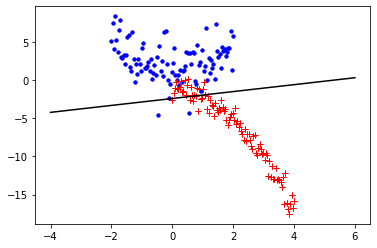

In [9]:
c1numpoints = 100
c2numpoints = 100

mu1 = 1
sigma1 = 2
noise1 = np.array([np.random.normal(mu1, sigma1, 100)])

mu2 = 1
sigma2 = 1
noise2 = np.array([np.random.normal(mu2, sigma2, 100)])

c1x = np.array([np.linspace(-2, 2, c1numpoints)])
c1y = c1x**2 + noise1

c2x = np.array([np.linspace(0, 4, c2numpoints)])
c2y = -(c2x**2 + noise2)

plt.plot(c1x, c1y, 'b.')
plt.plot(c2x, c2y, 'r+')

xtilde = np.vstack((np.hstack((np.ones((c1numpoints, 1)), np.hstack((c1x.T, c1y.T)))), 
                    np.hstack((np.ones((c2numpoints, 1)), np.hstack((c2x.T, c2y.T))))))
T = np.vstack((np.hstack((np.ones((c1numpoints, 1)), np.zeros((c1numpoints, 1)))), 
               np.hstack((np.zeros((c2numpoints, 1)), np.ones((c2numpoints, 1))))))

wtilde = np.matmul(np.linalg.pinv(xtilde), T)
x = np.linspace(-4, 6, 10000)
wdec = wtilde[:, 0] - wtilde[:, 1]
y = (-wdec[0] - (wdec[1] * x)) / wdec[2]

plt.plot(c1x, c1y, 'b.')
plt.plot(c2x, c2y, 'r+')
plt.plot(x, y, 'k-')

In [11]:
xtilde

array([[ 1.00000000e+00, -2.00000000e+00,  5.15184345e+00],
       [ 1.00000000e+00, -1.95959596e+00,  7.49366265e+00],
       [ 1.00000000e+00, -1.91919192e+00,  4.03931367e+00],
       [ 1.00000000e+00, -1.87878788e+00,  8.35182032e+00],
       [ 1.00000000e+00, -1.83838384e+00,  5.30403840e+00],
       [ 1.00000000e+00, -1.79797980e+00,  3.70299154e+00],
       [ 1.00000000e+00, -1.75757576e+00,  6.59716199e+00],
       [ 1.00000000e+00, -1.71717172e+00,  7.87913768e+00],
       [ 1.00000000e+00, -1.67676768e+00,  3.03869582e+00],
       [ 1.00000000e+00, -1.63636364e+00,  2.88481009e+00],
       [ 1.00000000e+00, -1.59595960e+00,  3.22129065e+00],
       [ 1.00000000e+00, -1.55555556e+00,  2.07229062e+00],
       [ 1.00000000e+00, -1.51515152e+00,  3.29607307e+00],
       [ 1.00000000e+00, -1.47474747e+00,  5.61848569e+00],
       [ 1.00000000e+00, -1.43434343e+00,  5.83824492e+00],
       [ 1.00000000e+00, -1.39393939e+00,  1.71621201e+00],
       [ 1.00000000e+00, -1.35353535e+00